In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import numpy as np
import datetime

In [2]:
from dateutil import parser

In [3]:
images = pd.read_csv('Image.csv')
events = pd.read_csv('Event.csv')
translations = pd.read_csv('Translation.csv')


In [4]:
# translations.head()
events

,objectId,updatedAt,createdAt,ACL,EventType,userId,translationId
0,gbeg1eMonb,Sat Apr 08 2023 17:11:41 GMT+0200 (Central Eur...,Sat Apr 08 2023 17:11:41 GMT+0200 (Central Eur...,NaN,login,0j1DDpxUEM,NaN
1,X87r3jrC4U,Sat Apr 08 2023 17:13:02 GMT+0200 (Central Eur...,Sat Apr 08 2023 17:13:02 GMT+0200 (Central Eur...,NaN,correctAnswer,0j1DDpxUEM,2JUUEdzqMg
2,xTPWEFF3nG,Sat Apr 08 2023 17:13:07 GMT+0200 (Central Eur...,Sat Apr 08 2023 17:13:07 GMT+0200 (Central Eur...,NaN,correctAnswer,0j1DDpxUEM,2JUUEdzqMg
3,bYakpj2GPb,Sat Apr 08 2023 17:13:23 GMT+0200 (Central Eur...,Sat Apr 08 2023 17:13:23 GMT+0200 (Central Eur...,NaN,correctAnswer,0j1DDpxUEM,cPAIKaGFeM
4,HbRTeSdhoo,Sat Apr 08 2023 17:13:28 GMT+0200 (Central Eur...,Sat Apr 08 2023 17:13:28 GMT+0200 (Central Eur...,NaN,correctAnswer,0j1DDpxUEM,WJAhIHUeDZ
...,...,...,...,...,...,...,...
338,YrH7MeuNBH,Fri Apr 28 2023 21:36:58 GMT+0200 (Central Eur...,Fri Apr 28 2023 21:36:58 GMT+0200 (Central Eur...,NaN,wrongAnswer,czIRI96DAz,4InyZIfvY4
339,0OflpuBtVW,Fri Apr 28 2023 21:37:01 GMT+0200 (Central Eur...,Fri Apr 28 2023 21:37:01 GMT+0200 (Central Eur...,NaN,correctAnswer,czIRI96DAz,4InyZIfvY4
340,CCFprBXimf,Fri Apr 28 2023 21:37:09 GMT+0200 (Central Eur...,Fri Apr 28 2023 21:37:09 GMT+0200 (Central Eur...,NaN,correctAnswer,czIRI96DAz,6trcSYK5IO
341,Pn5bYhd2CJ,Fri Apr 28 2023 21:37:15 GMT+0200 (Central Eur...,Fri Apr 28 2023 21:37:15 GMT+0200 (Central Eur...,NaN,correctAnswer,czIRI96DAz,1aclfsE9pN


In [5]:
begin = datetime.datetime.strptime('2023-04-07', '%Y-%m-%d')

translations['createdAt'] = translations['createdAt'].apply(lambda x: x[:24])
translations['createdAt'] = translations['createdAt'].apply(lambda x: datetime.datetime.strptime(x, '%a %b %d %Y %H:%M:%S'))
trans_test = translations.loc[translations['createdAt'] > begin] 
trans_test

,objectId,ACL,from,user,too_easy,updatedAt,createdAt,image,to
181,BhdH5lDUXS,NaN,skyl,czIRI96DAz,NaN,Fri Apr 07 2023 13:59:34 GMT+0200 (Central Eur...,2023-04-07 13:59:34,D8XpaETi5H,rinse
182,2JUUEdzqMg,NaN,økologisk,0j1DDpxUEM,NaN,Sat Apr 08 2023 17:12:35 GMT+0200 (Central Eur...,2023-04-08 17:12:35,fm6fBKvnbX,organically
183,cv0ubPmHVg,NaN,velkommen til bålpladsen,0j1DDpxUEM,NaN,Sun Apr 09 2023 16:43:24 GMT+0200 (Central Eur...,2023-04-09 16:43:24,hY1UBZEVyS,welcome to the campfire
184,7NT2SPCWTi,NaN,brygget siden,0j1DDpxUEM,NaN,Sun Apr 09 2023 17:09:34 GMT+0200 (Central Eur...,2023-04-09 17:09:34,rQ2vPzc2gP,brewed since
185,Bgsx5Rx4Cv,NaN,coffee,poBPkgLiOu,NaN,Mon Apr 10 2023 20:00:16 GMT+0200 (Central Eur...,2023-04-10 09:52:41,4kJLXeAWFT,coffee
...,...,...,...,...,...,...,...,...,...
237,JFgaFiiG6W,NaN,afventende,eDKufuv64E,NaN,Sat Apr 22 2023 21:15:33 GMT+0200 (Central Eur...,2023-04-22 21:15:33,JcG9jMW17B,pending
238,zadRfGHZ8f,NaN,afhængighedsskabende,NgENXB1IN3,NaN,Tue Apr 25 2023 16:33:58 GMT+0200 (Central Eur...,2023-04-25 16:33:58,7LMt65FuKL,addictive
239,nVC37aTxuW,NaN,tænkeplads,9VijwPXEHO,NaN,Thu Apr 27 2023 09:13:09 GMT+0200 (Central Eur...,2023-04-27 09:13:09,jilafDHaFm,thinking space
240,LsNkMvNWFE,NaN,"vi ved godt, set kan være svært lægge sine æg ...",czIRI96DAz,NaN,Thu Apr 27 2023 23:06:01 GMT+0200 (Central Eur...,2023-04-27 23:06:01,2o3BOOHZpm,We know that it can be difficult to put one's ...


In [6]:
events['translationId'].nunique()

114

In [7]:
unique_trans = events.groupby('userId')['translationId'].nunique().reset_index()
unique_trans

,userId,translationId
0,0j1DDpxUEM,20
1,9VijwPXEHO,6
2,ELXZysqgD5,4
3,NgENXB1IN3,27
4,R6Wb0k0VML,13
5,SZ50tVVwEq,4
6,W7sUAI8Lsh,54
7,czIRI96DAz,8
8,drxDLGwaxb,0
9,dy4k3eLx1j,34


In [33]:
trans_per_user = trans_test.groupby(['user'])['image'].nunique().reset_index()
trans_per_user

,user,image
0,0j1DDpxUEM,10
1,9VijwPXEHO,1
2,ELXZysqgD5,10
3,NgENXB1IN3,3
4,R6Wb0k0VML,1
5,SZ50tVVwEq,3
6,czIRI96DAz,3
7,drxDLGwaxb,2
8,dy4k3eLx1j,7
9,eDKufuv64E,3


In [38]:
trans_per_user = trans_per_user[trans_per_user['user'] != 'czIRI96DAz']
trans_per_user = trans_per_user[trans_per_user['user'] != 'poBPkgLiOu'] #me and one lady who dropped out

# trans_per_user.loc[1, 'image'] =  trans_per_user.loc[[1,4], 'image'].sum()
# 9VijwPXEHO and R6Wb0k0VML are one user so we will sum and drop one
trans_per_user = trans_per_user[trans_per_user['user'] != 'R6Wb0k0VML']

trans_per_user

,user,image
0,0j1DDpxUEM,10
1,9VijwPXEHO,2
2,ELXZysqgD5,10
3,NgENXB1IN3,3
5,SZ50tVVwEq,3
7,drxDLGwaxb,2
8,dy4k3eLx1j,7
9,eDKufuv64E,3
11,thPsSEyG1r,5
12,ywXlxTZg6o,12


<AxesSubplot:xlabel='User', ylabel='Number of pictures taken'>

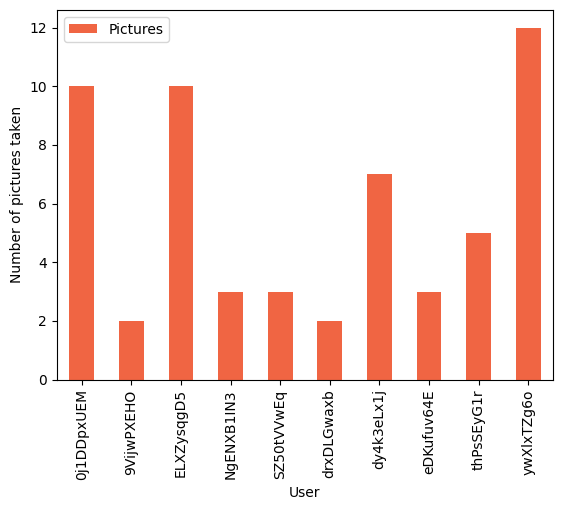

In [109]:
trans_per_user = trans_per_user.rename(columns = {'pictures':'Pictures'}) 
trans_per_user.plot.bar(x='userId', y='Pictures', ylabel='Number of pictures taken', xlabel="User", color='#F06543')

In [44]:
trans_per_user = trans_per_user.rename(columns = {'user':'userId'}) 
trans_per_user

,userId,pictures
0,0j1DDpxUEM,10
1,9VijwPXEHO,2
2,ELXZysqgD5,10
3,NgENXB1IN3,3
5,SZ50tVVwEq,3
7,drxDLGwaxb,2
8,dy4k3eLx1j,7
9,eDKufuv64E,3
11,thPsSEyG1r,5
12,ywXlxTZg6o,12


<AxesSubplot:xlabel='pictures'>

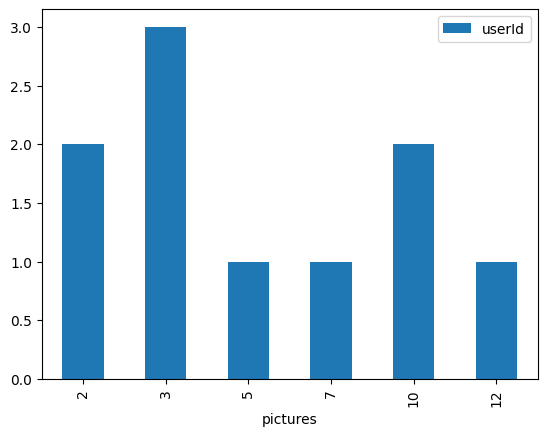

In [45]:
trans_per_user.groupby(['pictures']).nunique().plot.bar()

In [47]:
trans_per_user['pictures'].mean()

5.7

In [57]:
events_sum = events.groupby(['userId','EventType'])['objectId'].nunique().reset_index()

In [59]:
events_sum = events_sum[events_sum['EventType'] != 'login']
events_sum = events_sum[events_sum['EventType'] != 'logout']

In [60]:
events_sum['objectId'].sum()

318

In [115]:
# events_sum.loc[3, 'objectId'] =  events_sum.loc[[3,14], 'objectId'].sum()
# events_sum.loc[5, 'objectId'] =  events_sum.loc[[5,16], 'objectId'].sum()
events_sum  = events_sum[events_sum['userId'] != 'R6Wb0k0VML']
events_sum  = events_sum[events_sum['userId'] != 'czIRI96DAz']
events_sum  = events_sum[events_sum['userId'] != 'poBPkgLiOu']

events_sum

,userId,EventType,objectId
0,0j1DDpxUEM,correctAnswer,25
2,0j1DDpxUEM,wrongAnswer,9
3,9VijwPXEHO,correctAnswer,19
5,9VijwPXEHO,wrongAnswer,2
6,ELXZysqgD5,correctAnswer,7
9,ELXZysqgD5,wrongAnswer,5
10,NgENXB1IN3,correctAnswer,31
13,NgENXB1IN3,wrongAnswer,4
17,SZ50tVVwEq,correctAnswer,4
20,W7sUAI8Lsh,correctAnswer,77


<AxesSubplot:xlabel='User', ylabel='Number of quizzes'>

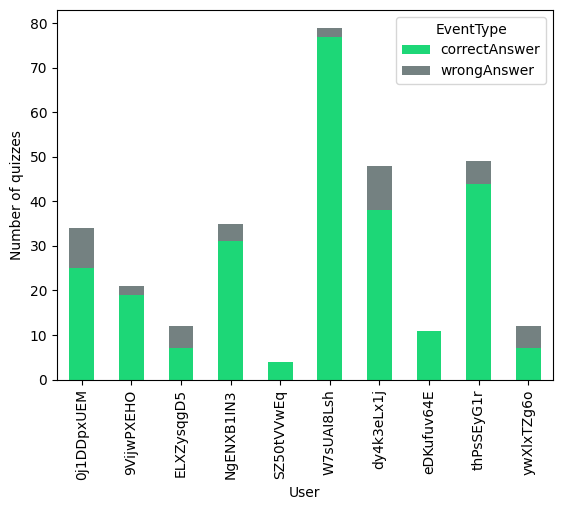

In [116]:
events_sum_pivoted = events_sum.pivot_table('objectId', ['userId'], 'EventType')
events_sum_pivoted.plot.bar(stacked=True, color=['#1DD777','#748181'], ylabel="Number of quizzes", xlabel="User")

In [117]:
answers_sum = events_sum.groupby(["userId"]).objectId.sum().reset_index()
answers_sum

,userId,objectId
0,0j1DDpxUEM,34
1,9VijwPXEHO,21
2,ELXZysqgD5,12
3,NgENXB1IN3,35
4,SZ50tVVwEq,4
5,W7sUAI8Lsh,79
6,dy4k3eLx1j,48
7,eDKufuv64E,11
8,thPsSEyG1r,49
9,ywXlxTZg6o,12


In [118]:
merge = pd.merge(answers_sum,trans_per_user,how="left",on="userId")
merge = merge[merge['userId'] != 'czIRI96DAz']

In [119]:
merge

,userId,objectId,Pictures
0,0j1DDpxUEM,34,10.0
1,9VijwPXEHO,21,2.0
2,ELXZysqgD5,12,10.0
3,NgENXB1IN3,35,3.0
4,SZ50tVVwEq,4,3.0
5,W7sUAI8Lsh,79,NaN
6,dy4k3eLx1j,48,7.0
7,eDKufuv64E,11,3.0
8,thPsSEyG1r,49,5.0
9,ywXlxTZg6o,12,12.0


In [125]:
# merge = merge.set_index('userId')
merge = merge.rename(columns={'objectId': 'Quizzes', 'pictures': 'Pictures'})

<AxesSubplot:xlabel='User'>

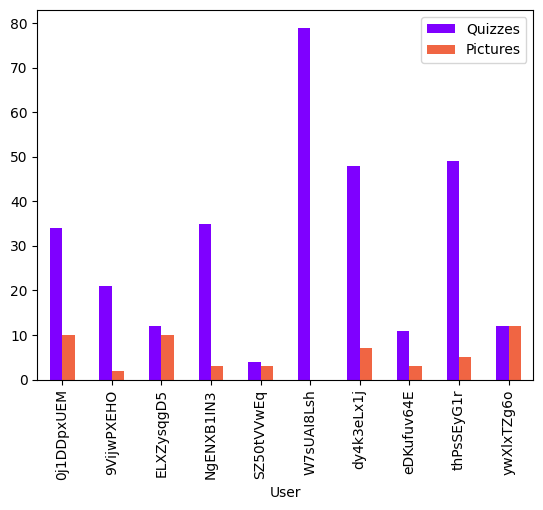

In [126]:
# events_sum_pivoted = merge.pivot_table('objectId', ['userId'], 'EventType')
merge.plot.bar(color=['#7F00FF', '#F06543'],xlabel="User")

<AxesSubplot:xlabel='User'>

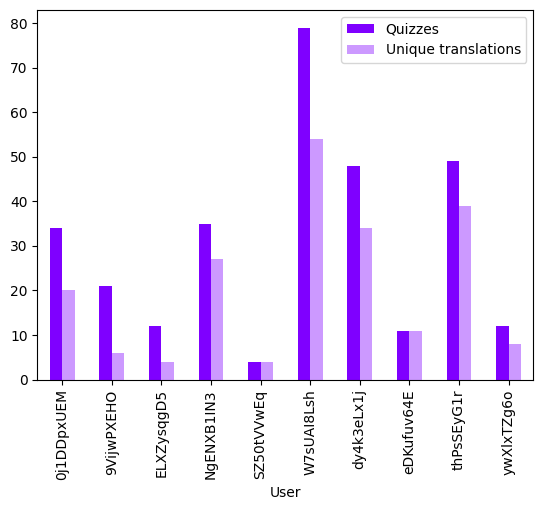

In [122]:
answers_unique_trans = pd.merge(answers_sum,unique_trans,how="left",on="userId")
answers_unique_trans = answers_unique_trans.rename(columns={'objectId': 'Quizzes', 'translationId': 'Unique translations'})
answers_unique_trans.set_index('userId').plot.bar(color=['#7F00FF', '#CC99FF'], xlabel="User")

In [67]:
trans_test.groupby(['to']).nunique()

,objectId,ACL,from,user,too_easy,updatedAt,createdAt,image
to,,,,,,,,
Can your organization develop if you don't do that?,1,0,1,1,0,1,1,1
Do not touch,1,0,1,1,0,1,1,1
Driveway,1,0,1,1,0,1,1,1
GUARD,1,0,1,1,0,1,1,1
I love you,1,0,1,1,0,1,1,1
Juneberry flavor,1,0,1,1,0,1,1,1
PC,1,0,1,1,0,1,1,1
Peace & Freedom,1,0,1,1,0,1,1,1
The paths are cleared of snow and graveled only occasionally,1,0,1,1,0,1,1,1


In [85]:
# trans_test['createdAt'] = trans_test['createdAt'].apply(lambda x: str(x)[:-9])
time = trans_test.groupby(['createdAt','user'])['objectId'].nunique().reset_index()
time = time.rename(columns={'user': 'userId', 'objectId': 'images', 'createdAt': 'imageCreatedAt'})
time
# time['createdAt'].plot()

,imageCreatedAt,userId,images
0,2023-04-07,czIRI96DAz,1
1,2023-04-08,0j1DDpxUEM,1
2,2023-04-09,0j1DDpxUEM,2
3,2023-04-10,0j1DDpxUEM,1
4,2023-04-10,drxDLGwaxb,2
5,2023-04-10,poBPkgLiOu,1
6,2023-04-11,0j1DDpxUEM,2
7,2023-04-11,ELXZysqgD5,4
8,2023-04-11,NgENXB1IN3,1
9,2023-04-11,eDKufuv64E,1


In [98]:
begin = datetime.datetime.strptime('2023-04-07', '%Y-%m-%d')

# events['createdAt'] = events['createdAt'].apply(lambda x: x[:24])
events['createdAt'] = events['createdAt'].apply(lambda x: x[:-9])
events
# events['createdAt'] = events['createdAt'].apply(lambda x: datetime.datetime.strptime(x, '%a %b %d %Y'))


,objectId,updatedAt,createdAt,ACL,EventType,userId,translationId
0,gbeg1eMonb,Sat Apr 08 2023 17:11:41 GMT+0200 (Central Eur...,Sat Apr 08 2023,NaN,login,0j1DDpxUEM,NaN
1,X87r3jrC4U,Sat Apr 08 2023 17:13:02 GMT+0200 (Central Eur...,Sat Apr 08 2023,NaN,correctAnswer,0j1DDpxUEM,2JUUEdzqMg
2,xTPWEFF3nG,Sat Apr 08 2023 17:13:07 GMT+0200 (Central Eur...,Sat Apr 08 2023,NaN,correctAnswer,0j1DDpxUEM,2JUUEdzqMg
3,bYakpj2GPb,Sat Apr 08 2023 17:13:23 GMT+0200 (Central Eur...,Sat Apr 08 2023,NaN,correctAnswer,0j1DDpxUEM,cPAIKaGFeM
4,HbRTeSdhoo,Sat Apr 08 2023 17:13:28 GMT+0200 (Central Eur...,Sat Apr 08 2023,NaN,correctAnswer,0j1DDpxUEM,WJAhIHUeDZ
...,...,...,...,...,...,...,...
338,YrH7MeuNBH,Fri Apr 28 2023 21:36:58 GMT+0200 (Central Eur...,Fri Apr 28 2023,NaN,wrongAnswer,czIRI96DAz,4InyZIfvY4
339,0OflpuBtVW,Fri Apr 28 2023 21:37:01 GMT+0200 (Central Eur...,Fri Apr 28 2023,NaN,correctAnswer,czIRI96DAz,4InyZIfvY4
340,CCFprBXimf,Fri Apr 28 2023 21:37:09 GMT+0200 (Central Eur...,Fri Apr 28 2023,NaN,correctAnswer,czIRI96DAz,6trcSYK5IO
341,Pn5bYhd2CJ,Fri Apr 28 2023 21:37:15 GMT+0200 (Central Eur...,Fri Apr 28 2023,NaN,correctAnswer,czIRI96DAz,1aclfsE9pN


In [99]:
events_time = events.groupby(['createdAt','userId','EventType'])['objectId'].nunique().reset_index()
events_time

,createdAt,userId,EventType,objectId
0,Fri Apr 14 2023,W7sUAI8Lsh,correctAnswer,12
1,Fri Apr 21 2023,SZ50tVVwEq,login,2
2,Fri Apr 21 2023,SZ50tVVwEq,logout,1
3,Fri Apr 21 2023,ywXlxTZg6o,correctAnswer,7
4,Fri Apr 21 2023,ywXlxTZg6o,login,2
...,...,...,...,...
57,Tue Apr 25 2023,NgENXB1IN3,wrongAnswer,4
58,Wed Apr 12 2023,NgENXB1IN3,correctAnswer,1
59,Wed Apr 12 2023,R6Wb0k0VML,correctAnswer,4
60,Wed Apr 19 2023,SZ50tVVwEq,correctAnswer,4


In [101]:
merge_time = pd.merge(events_time,time,how="left",on="userId")
merge_time

,createdAt,userId,EventType,objectId,imageCreatedAt,images
0,Fri Apr 14 2023,W7sUAI8Lsh,correctAnswer,12,NaN,NaN
1,Fri Apr 21 2023,SZ50tVVwEq,login,2,2023-04-19,1.0
2,Fri Apr 21 2023,SZ50tVVwEq,login,2,2023-04-20,1.0
3,Fri Apr 21 2023,SZ50tVVwEq,login,2,2023-04-30,1.0
4,Fri Apr 21 2023,SZ50tVVwEq,logout,1,2023-04-19,1.0
...,...,...,...,...,...,...
147,Wed Apr 19 2023,SZ50tVVwEq,correctAnswer,4,2023-04-20,1.0
148,Wed Apr 19 2023,SZ50tVVwEq,correctAnswer,4,2023-04-30,1.0
149,Wed Apr 26 2023,eDKufuv64E,correctAnswer,4,2023-04-11,1.0
150,Wed Apr 26 2023,eDKufuv64E,correctAnswer,4,2023-04-20,1.0
